# Identify Fraud From Enron Email Dataset

In 2000, Enron was one of the largest companies in the United States in energy trading and was named as 'America's most innovative company'. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. In this project, i have applied my machine learning skills by building a person of interest identifier based on financial and email data made public as a result of the Enron scandal. To assist, we've combined this data with a hand-generated list of persons of interest in the fraud case, which means individuals who were indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity.

There are seven major steps in my project:
1. Load the Dataset and Query the dataset.
2. Outlier Detection and Removal
3. Feature Pre-processing
4. Classifier
5. Comparison of different classifier
6. Parameter Tuning
7. Validation of Classifier

## Load The Dataset


In [347]:
""" 
    Starter code for exploring the Enron dataset (emails + finances);
    loads up the dataset (pickled dict of dicts).

    The dataset has the form:
    enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"] = { features_dict }

    {features_dict} is a dictionary of features associated with that person.
    and here's an example to get you started:

    enron_data["SKILLING JEFFREY K"]["bonus"] = 5600000
    
"""

import pickle

enron_data = pickle.load(open("../final_project/final_project_dataset.pkl", "r"))
print "There are "+str(len(enron_data))+" executives in Enron Dataset"

There are 146 executives in Enron Dataset


In [348]:
count=0
for i in enron_data:
    if(enron_data[i]["poi"]==1):
        count=count+1
print "There are "+str(count)+" Person of Interest(POI) and "+str((len(enron_data))-(count))+" Non-POIs  in our Dataset "

There are 18 Person of Interest(POI) and 128 Non-POIs  in our Dataset 


In [349]:
print "There are "+str(len(enron_data["SKILLING JEFFREY K"]))+" features available for each person"

There are 21 features available for each person


In [403]:
print "The 21 features are listed below:"
k=1
features_list=['poi']
for i in enron_data["SKILLING JEFFREY K"]:
    print "Feature "+str(k)+": "+i
    if (i!='poi' and type(enron_data["SKILLING JEFFREY K"][i])==int):
        features_list.append(i)
    k = k+1
print "Features_list:"+str(features_list)

The 21 features are listed below:
Feature 1: salary
Feature 2: to_messages
Feature 3: deferral_payments
Feature 4: total_payments
Feature 5: exercised_stock_options
Feature 6: bonus
Feature 7: restricted_stock
Feature 8: shared_receipt_with_poi
Feature 9: restricted_stock_deferred
Feature 10: total_stock_value
Feature 11: expenses
Feature 12: loan_advances
Feature 13: from_messages
Feature 14: other
Feature 15: from_this_person_to_poi
Feature 16: poi
Feature 17: director_fees
Feature 18: deferred_income
Feature 19: long_term_incentive
Feature 20: email_address
Feature 21: from_poi_to_this_person
Features_list:['poi', 'salary', 'to_messages', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'total_stock_value', 'expenses', 'from_messages', 'other', 'from_this_person_to_poi', 'long_term_incentive', 'from_poi_to_this_person']


# Outlier Detection and Removal

Just going through the Enron Dataset,I found Outlier when Bonus of people were plotted against the salary of person.


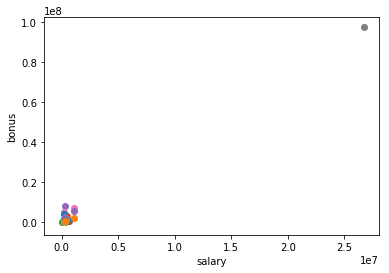

In [404]:
import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features,remove_any_zeroes=True)

for point in data:
    salary = point[0]
    bonus = point[1]
    
    matplotlib.pyplot.scatter(salary, bonus )
matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [405]:
#finding the point of outlier
for key, value in data_dict.items():
    if value['bonus'] == data.max():
        print key

TOTAL


As it can be seen "TOTAL" is irrelavant point.Therefor is removed and grapg is replotted below.

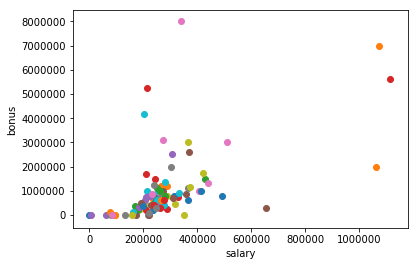

In [406]:
data_dict.pop('TOTAL',0)
data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()



In [407]:
##other ouliers
outliers = []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue 
    
    outliers.append((key,int(val)))
    
outliers_final = (sorted(outliers,key=lambda x:x[1],reverse=True)[:2])
outliers_final

[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321)]

These points cannot be removed from dataset as they are important people in Enron case and represent as the person of Interest(POI).

### Linear Regression to predict Bonus from salary
Now,To predict the bonus of an Employee when only salary of a person is only given.Linear Regression is used.
In regression, you need training and testing data, just like in classification.
We will see how outlier affect the Regression.
Outlier Detection and Removal is a process which comprise of:

1. Train the dataset.
2. Identify the outlier and remove the points with Residual Error.
3. Re-Train the dataset.

[ 0.27229528]
-0.877354252073


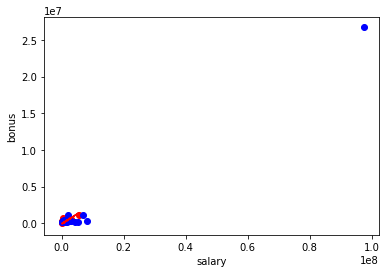

In [408]:
## Training the data
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
data = featureFormat(data_dict, features,remove_any_zeroes=True)
features = ["salary", "bonus"]
target, feature = targetFeatureSplit( data )

from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.5, random_state=42)
from sklearn.linear_model import LinearRegression as lr
reg=lr()
reg.fit(feature_train,target_train)
try:
    matplotlib.pyplot.plot( feature_test, reg.predict(feature_test),color='r' )
except NameError:
    pass

print reg.coef_
print reg.score(feature_test , target_test)


import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    matplotlib.pyplot.scatter( feature, target, color="r" ) 
for feature, target in zip(feature_train, target_train):
    matplotlib.pyplot.scatter( feature, target, color="b" ) 
matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()


[ 0.03954061]
0.203020850473


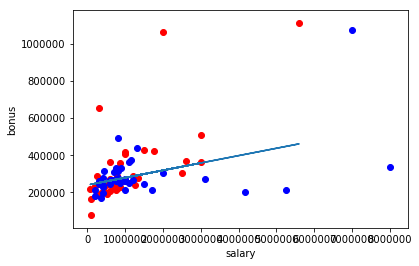

In [409]:
### Identification of outlier
#!/usr/bin/python


data_dict.pop('TOTAL',0)
# data_dict.pop('LAVORATO JOHN J',0)
data = featureFormat(data_dict, features,remove_any_zeroes=True)
target, feature = targetFeatureSplit( data )

from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.5, random_state=42)
from sklearn.linear_model import LinearRegression as lr
reg=lr()
reg.fit(feature_train,target_train)
try:
    matplotlib.pyplot.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

print reg.coef_
print reg.score(feature_test , target_test)


import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    matplotlib.pyplot.scatter( feature, target, color="r" ) 
for feature, target in zip(feature_train, target_train):
    matplotlib.pyplot.scatter( feature, target, color="b" ) 

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

It can be observed how outlier affects the result of Regression.There is drastic difference between regression score with  outlier and without outlier.Therefore outliers must be removed from dataset before any conclusions.

## Feature Processing


### New Features

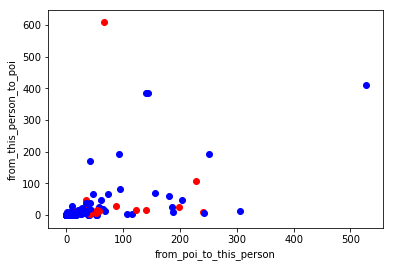

In [410]:
# from sklearn.feature_selection import SelectKBest, f_classif

# selector = SelectKBest(f_classif, k=10)
# selector.fit(features_train, labels_train)
# features_train_transformed = selector.transform(features_train).toarray()
# features_test_transformed  = selector.transform(features_test).toarray()

##New Features
def dict_to_list(key,normalizer):
    new_list=[]

    for i in data_dict:
        if data_dict[i][key]=="NaN" or data_dict[i][normalizer]=="NaN":
            new_list.append(0.)
        elif data_dict[i][key]>=0:
            new_list.append(float(data_dict[i][key])/float(data_dict[i][normalizer]))
    return new_list

### create two lists of new features
fraction_from_poi_email=dict_to_list("from_poi_to_this_person","to_messages")
fraction_to_poi_email=dict_to_list("from_this_person_to_poi","from_messages")

### insert new features into data_dict
count=0
for i in data_dict:
    data_dict[i]["fraction_from_poi_email"]=fraction_from_poi_email[count]
    data_dict[i]["fraction_to_poi_email"]=fraction_to_poi_email[count]
    count +=1


### store to my_dataset for easy export below
my_dataset = data_dict
for item in data_dict:
    Fraction_to=data_dict[item]['from_this_person_to_poi']
    Fraction_From=data_dict[item]['from_poi_to_this_person']
    if(data_dict[item]['poi']==1):
       matplotlib.pyplot.scatter( Fraction_From, Fraction_to,color='r' )
    else:
       matplotlib.pyplot.scatter( Fraction_From, Fraction_to,color='b' )
matplotlib.pyplot.xlabel("from_poi_to_this_person")
matplotlib.pyplot.ylabel("from_this_person_to_poi")
matplotlib.pyplot.show()


When I picked 'from_poi_to_this_person' and 'from_this_person_to_poi' but there is was no strong pattern
when I plotted the data so I used fractions for both features of “from/to poi messages” and “total
from/to messages”.

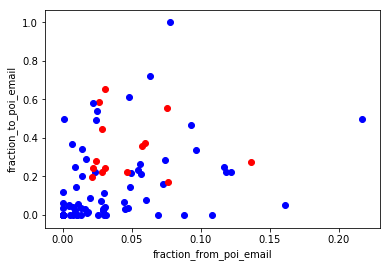

In [411]:
for item in data_dict:
    Fraction_to=data_dict[item]['fraction_to_poi_email']
    Fraction_From=data_dict[item]['fraction_from_poi_email']
    if(data_dict[item]['poi']==1):
       matplotlib.pyplot.scatter( Fraction_From, Fraction_to,color='r' )
    else:
       matplotlib.pyplot.scatter( Fraction_From, Fraction_to,color='b' )
matplotlib.pyplot.xlabel("fraction_from_poi_email")
matplotlib.pyplot.ylabel("fraction_to_poi_email")
matplotlib.pyplot.show()

Two new features were created and tested for this project. These were:
● the fraction of all emails to a person that were sent from a person of interest;
● the fraction of all emails that a person sent that were addressed to persons of interest.
My assumption was that there is stronger connection between POI’s via email then that between POI’s
and non-POI’s. When we look at scatterplot we can agree that the data pattern confirms said
above, e.i. there is no POI below 0.2 in “x” axis.


## Classification Algorithm for Enron Dataset


In [412]:
##Naive Bayesian Classifier
data = featureFormat(data_dict,features_list)
labels, features = targetFeatureSplit(data)

from sklearn.cross_validation import train_test_split
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.3,random_state=42)
from sklearn.naive_bayes import GaussianNB
from time import time
t0 = time()

clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
print "Accuracy when using Naive Bayes Classifier:"+str(accuracy)
print "Precision: " +str(precision_score(pred,labels_test))
print "Recall: "+str(recall_score(pred,labels_test))
print "NB algorithm time:", round(time()-t0, 3), "s"


Accuracy when using Naive Bayes Classifier:0.590909090909
Precision: 0.5
Recall: 0.222222222222
NB algorithm time: 0.009 s


In [413]:
##Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
t0 = time()

clf=DecisionTreeClassifier()
clf.fit(features_train,labels_train)
pred=clf.predict(features_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score
acc=accuracy_score(pred,labels_test)

print "Accuracy when using Decision Tree Classifier: " + str(acc)
print "DT algorithm time:", round(time()-t0, 3), "s"
print "Precision: " +str(precision_score(pred,labels_test))
print "Recall: "+str(recall_score(pred,labels_test))

Accuracy when using Decision Tree Classifier: 0.636363636364
DT algorithm time: 0.007 s
Precision: 0.25
Recall: 0.166666666667


Now accuracy is not much therefore need of Feature selection to maximize the performance.As the number of features decrease to important features the 
* Dataset is reduced.Less data with more information.
* Less features Predict the label more accurately.

### Feature Selection
feature importances :

The feature importances. The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.
Now feature importance is calculated using decision tree


In [414]:
dict={}
key=0
for i in clf.feature_importances_:
    dict[features_list[key]]=i
    key = key+1
key_list=sorted([value for key,value in dict.items()],reverse=True)
print key_list

feature_list=['poi']
for k in range(6):
    for i in range(len(key_list)-1):
        if(dict[features_list[i]]==key_list[k] and features_list[i]!='poi'and features_list[i]!='other' ):
            feature_list.append(features_list[i])
print "New Feature List: "+ str(feature_list)

[0.30664643327686802, 0.19287949921752737, 0.18550724637681168, 0.14814814814814811, 0.083333333333333315, 0.062652006313978229, 0.020833333333333329, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
New Feature List: ['poi', 'from_messages', 'total_payments', 'salary', 'total_stock_value', 'exercised_stock_options']


Now using above features with high gini importance is chosen for getting optimal accuracy.

In [415]:

data = featureFormat(data_dict, feature_list)
labels, features = targetFeatureSplit(data)

from sklearn.cross_validation import train_test_split
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.3,random_state=42)
from sklearn.naive_bayes import GaussianNB
from time import time
t0 = time()

clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
print "Accuracy when using Naive Bayes Classifier:"+str(accuracy)
print "Precision: " +str(precision_score(pred,labels_test))
print "Recall: "+str(recall_score(pred,labels_test))
print "NB algorithm time:", round(time()-t0, 3), "s"

Accuracy when using Naive Bayes Classifier:0.860465116279
Precision: 0.2
Recall: 0.333333333333
NB algorithm time: 0.005 s


### Using whole dataset for training and Testing
When there is no splitting of dataset into Training and Testing set i.e. same data is used for classification and prediction can be seen below:

In [416]:

clf=DecisionTreeClassifier()
clf.fit(features,labels)
pred=clf.predict(features)


from sklearn.metrics import accuracy_score
acc=accuracy_score(pred,labels)
print acc

1.0


Accuracy Score is increased to 1 but there are two problems when there is no splitting of dataset into Training and Testing data:
* Performance of the algorithm cannot be compared.
* Overfitting of Data .

### Using splitted dataset for Training and Testing
Therefore splitting the dataset into Training and testing dataset as shown below:

In [417]:
t0 = time()

clf=DecisionTreeClassifier()
clf.fit(features_train,labels_train)
pred=clf.predict(features_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score
acc=accuracy_score(pred,labels_test)

print "Accuracy when using Decision Tree Classifier: " + str(acc)
print "DT algorithm time:", round(time()-t0, 3), "s"
print "Precision: " +str(precision_score(pred,labels_test))
print "Recall: "+str(recall_score(pred,labels_test))

Accuracy when using Decision Tree Classifier: 0.744186046512
DT algorithm time: 0.002 s
Precision: 0.2
Recall: 0.125


Now checking the accuracy while introducing new features in the Features_list.

In [418]:
feature_list.append('fraction_to_poi_email')
feature_list.append('fraction_from_poi_email')
print feature_list

['poi', 'from_messages', 'total_payments', 'salary', 'total_stock_value', 'exercised_stock_options', 'fraction_to_poi_email', 'fraction_from_poi_email']


In [421]:

data = featureFormat(data_dict, feature_list)
labels, features = targetFeatureSplit(data)

from sklearn.cross_validation import train_test_split
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.3,random_state=42)
t0 = time()

clf=DecisionTreeClassifier()
clf.fit(features_train,labels_train)
pred=clf.predict(features_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score
acc=accuracy_score(pred,labels_test)

print "Accuracy when using Decision Tree Classifier: " + str(acc)
print "DT algorithm time:", round(time()-t0, 3), "s"
print "Precision: " +str(precision_score(pred,labels_test))
print "Recall: "+str(recall_score(pred,labels_test))

Accuracy when using Decision Tree Classifier: 0.767441860465
DT algorithm time: 0.001 s
Precision: 0.4
Recall: 0.222222222222


I see that the new features improved both precision and recall. Precision jumped from 0.20 to 0.40 and recall jumped from 0.125 to 0.222. So, this states that the new features improved performance and should probably be included in the final feature set.  When trying new subset of features by manually selecting different set of features as shown in below found the accuracy,precision and Recall increase significantly.
### Manual Selection of features
Now manually selecting features having new features into consideration which increase the accuracy from 76 % to 92% and precision and recall from 0.4 t0 0.5 and 0.22 to 1 respectively.


In [449]:

%%html
<table>
<tr>
<th>Features along with new features</th>
<th>Precision</th>
<th>Recall</th>
<th>Accuracy</th>
</tr>
<tr>
<td>stock features</td>
<td>0.125</td>
<td>.33</td>
<td>0.76</td>

</tr>
<tr>
<td>salary features</td>
<td>0.25</td>
<td>0.66</td>
<td>0.78</td>
</tr>
<tr>
<td>Poi related features</td>
<td>.5</td>
<td>1</td>
<td>0.92</td>
</tr>
</table>

Features along with new features,Precision,Recall,Accuracy
stock features,0.125,.33,0.76
salary features,0.25,0.66,0.78
Poi related features,.5,1,0.92


In [446]:
#features_list = ["poi", "fraction_from_poi_email", "fraction_to_poi_email", 'shared_receipt_with_poi']
# features_list = ["poi", "fraction_from_poi_email", "fraction_to_poi_email", 'exercised_stock_options','total_stock_value']
features_list = ["poi", "fraction_from_poi_email", "fraction_to_poi_email", 'salary','bonus','long_term_incentive']
data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)
### use KFold for split and validate algorithm
from sklearn.cross_validation import KFold
kf=KFold(len(labels),3)
for train_indices, test_indices in kf:
    #make training and testing sets
    features_train= [features[ii] for ii in train_indices]
    features_test= [features[ii] for ii in test_indices]
    labels_train=[labels[ii] for ii in train_indices]
    labels_test=[labels[ii] for ii in test_indices]

from sklearn.cross_validation import train_test_split
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.3,random_state=42)
t0 = time()

clf=DecisionTreeClassifier()
clf.fit(features_train,labels_train)
pred=clf.predict(features_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score
acc=accuracy_score(pred,labels_test)

print "Accuracy when using Decision Tree Classifier: " + str(acc)
print "DT algorithm time:", round(time()-t0, 3), "s"
print "Precision: " +str(precision_score(pred,labels_test))
print "Recall: "+str(recall_score(pred,labels_test))
t0 = time()

clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
print "Accuracy when using Naive Bayes Classifier:"+str(accuracy)
print "Precision: " +str(precision_score(pred,labels_test))
print "Recall: "+str(recall_score(pred,labels_test))
print "NB algorithm time:", round(time()-t0, 3), "s"

Accuracy when using Decision Tree Classifier: 0.787878787879
DT algorithm time: 0.003 s
Precision: 0.5
Recall: 0.285714285714
Accuracy when using Naive Bayes Classifier:0.878787878788
Precision: 0.25
Recall: 0.5
NB algorithm time: 0.012 s


### Comparison of classifier
                

In [428]:
%%html
<table>
<tr>
<th></th>
<th>Naive Bayes </th>
<th>Decision Tree Classifier</th>
</tr>
<tr>
<td>Precision</td>
<td>0</td>
<td>0.5</td>
</tr>
<tr>
<td>Recall</td>
<td>0</td>
<td>1</td>
</tr>
</tr>
<tr>
<td>Accuracy</td>
<td>0.80</td>
<td>0.92</td>
</tr>
</table>

,Naive Bayes,Decision Tree Classifier
Precision,0,0.5
Recall,0,1
Accuracy,0.80,0.92


## Parameter Tuning 
Tuning is changing values of parameters present in the classifier to get optimal accuracy matrics
and comparing them to get best classifier.
In this dataset I cannot use accuracy for evaluating my algorithm because there a few POI’s in
dataset and the best evaluator are precision and recall. There were only 18 examples of POIs in
the dataset. There were 35 people who were POIs in “real life”, but for various reasons, half of
those are not present in this dataset.Therefore kfold is used with the classifier.

By manually setting the min_samples_split parameter in Decision Tree, Precision and Recall can be compared.
Parameter min_samples_split are used to get best classifier.

In [401]:
def dt_min_samples_split(k):
    t0 = time()

    clf=DecisionTreeClassifier(min_samples_split=k)
    clf.fit(features_train,labels_train)
    pred=clf.predict(features_test)

    from sklearn.metrics import accuracy_score,precision_score,recall_score
    acc=accuracy_score(pred,labels_test)

    print "Accuracy when using Decision Tree Classifier: " + str(acc)
    print "DT algorithm time:", round(time()-t0, 3), "s"
    print "Precision: " +str(precision_score(pred,labels_test))
    print "Recall: "+str(recall_score(pred,labels_test))
    
dt_min_samples_split(2)
dt_min_samples_split(3)
dt_min_samples_split(5)
dt_min_samples_split(10)
dt_min_samples_split(15)
dt_min_samples_split(20)

Accuracy when using Decision Tree Classifier: 0.884615384615
DT algorithm time: 0.001 s
Precision: 0.5
Recall: 0.666666666667
Accuracy when using Decision Tree Classifier: 0.923076923077
DT algorithm time: 0.002 s
Precision: 0.5
Recall: 1.0
Accuracy when using Decision Tree Classifier: 0.884615384615
DT algorithm time: 0.001 s
Precision: 0.5
Recall: 0.666666666667
Accuracy when using Decision Tree Classifier: 0.884615384615
DT algorithm time: 0.002 s
Precision: 0.5
Recall: 0.666666666667
Accuracy when using Decision Tree Classifier: 0.846153846154
DT algorithm time: 0.002 s
Precision: 0.75
Recall: 0.5
Accuracy when using Decision Tree Classifier: 0.769230769231
DT algorithm time: 0.001 s
Precision: 0.75
Recall: 0.375


## Validation Of Classifier
The validation of the algorithm performance is conducted use the tester function
provided (without changing). The function uses cross validation with 1000 folds.As the 
data related to POIs is very less i.e. 18 POIs from 146 executives.Therefore 3 fold cross
validation is used above and tester uses upto thousand folds to validate the classifier.
Precision: precision is defined as the number true positive divided by the number of
person labels as positive. A higher precision value means a person flag out as a POI is
more likely to be a true POI. Recall: recall is defined as the number of true positive
divided by the total number of positive. A higher recall value mean if a person is a POI,
the algorithm is more likely to flag this person out.

First I used accuracy to evaluate my algorithm. It was a mistake because in this case we have a
class imbalance problem : the number of POIs is small compared to the total number of
examples in the dataset. So I had to use precision and recall for these activities instead.
I was able to reach average value of precision = 0.6, recall = 0.771.

As it can be clearly seen in above results if whole dataset is used for classification and
prediction Then the result will be biased. 
The accuracy will be high but there is no sureity that the classifier can predict
well for future inputs or not. To varify this targetdatasplit is done as for training the
classifier on training set and predicting on Testing dataset.The accuracy is also measured 
on Testing dataset to validate the classifier.


In [429]:
%%html
<table>
<tr>
<th></th>
<th>Precision</th>
<th>Recall</th>
</tr>
<tr>
<td>min_sample_split=2</td>
<td>0.5</td>
<td>.66</td>
</tr>
<tr>
<td>min_sample_split=3</td>
<td>0.5</td>
<td>1</td>
</tr>
<tr>
<td>min_sample_split=5</td>
<td>.5</td>
<td>.66</td>
</tr>
<tr>
<td>min_sample_split=10</td>
<td>0.5</td>
<td>.6</td>
</tr>
<tr>
<td>min_sample_split=15</td>
<td>0.75</td>
<td>.5</td>
</tr>
<tr>
<td>min_sample_split=20</td>
<td>0.75</td>
<td>.35</td>
</tr>
</table>

,Precision,Recall
min_sample_split=2,0.5,.66
min_sample_split=3,0.5,1
min_sample_split=5,.5,.66
min_sample_split=10,0.5,.6
min_sample_split=15,0.75,.5
min_sample_split=20,0.75,.35



It can be seen that with less tuning the value of precision and recall is less and as the parameter is tuned the accuracy metrics increases but if the parameter is overtuned the precision & recall decreases. Therefore value of parameter has to be decided carefully.
There is usually a trade off between precision and recall. An algorithm strong at one metric may be weak at the other metric. So when it comes to decide which algorithm is better, it come to how do we define risk. Is it more risky to flag out as a POI who is actually not or is it more risky to miss a true POI? That is in the eyes of the beholder.

# Conclusion
Firstly I tried Naive Bayes accuracy was lower than with Decision Tree Algorithm (0.80 and 0.92
respectively). I made a conclusion that that the feature set I used does not suit the distributional
and interactive assumptions of Naive Bayes well.
I selected Decision Tree Algorithm for the POI identifier. It gave me accuracy before tuning
parameters = 0.88. No feature scaling was used, as it’s not necessary when using a decision
tree.
After selecting features and algorithm I manually tuned parameter min_samples_split.
After using min_samples_split as 3 the Decision Tree gave maximum accuracy.
